In [32]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

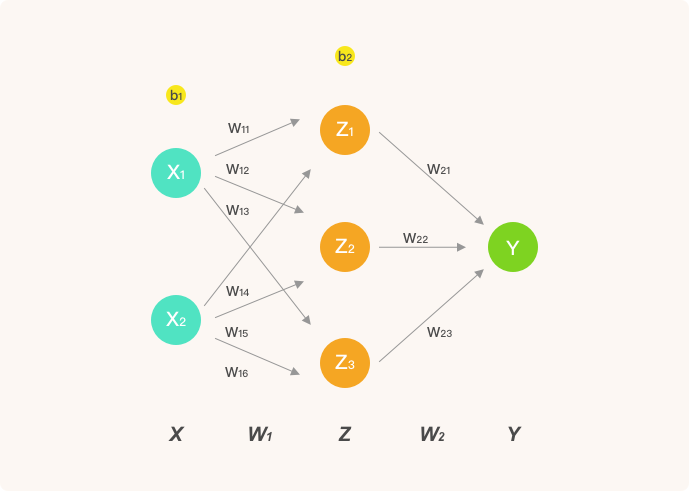

In [33]:
## 这里把b 省略了

def sigmoid(x):
    return 1/(1+np.exp(-x))


def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

In [34]:
np.random.randn(3, 2)

array([[ 0.73350231,  1.49158747],
       [-1.38329115, -0.70435202],
       [-0.74007935, -0.80194129]])

In [83]:
class TwoLayersNeuralNetwork:
    
    def __init__(self, X, y, lr=0.01):
        self.X = X
        self.y = y
        
        self.W1 = np.random.randn(X.shape[1], 3)
        self.W2 = np.random.randn(3, 1)
        
        self.lr = lr
        self.output_layer = np.zeros(self.y.shape)

    
    def forward(self):
        
        self.hidden_layer = sigmoid(np.dot(self.X, self.W1))  #Nx2  2x3 =>  NX3
        
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.W2)) # Nx3  3x1 => Nx1
        
    def backward(self):
        
        dZ2 = (self.output_layer-self.y)*sigmoid_derivative(np.dot(self.hidden_layer, self.W2)) # Nx1 * (Nx3. 3x1) 
        
        dW2 = np.dot(self.hidden_layer.T, dZ2)
        
        dZ1 = np.dot(dZ2, self.W2.T)*sigmoid_derivative(np.dot(self.X, self.W1))
  
        dW1 = np.dot(self.X.T, dZ1)
        
        self.W1 -= self.lr*dW1
        self.W2 -= self.lr*dW2
        
    
    def loss(self):
        return np.sum((self.y - self.output_layer)**2)
    
    def predict(self, X, W1, W2):
        hidden_layer = sigmoid(np.dot(X, W1))  #Nx2  2x3 =>  NX3
        output_layer = sigmoid(np.dot(hidden_layer, W2)) # Nx3  3x1 => Nx1
        prediction = (output_layer>0.5)
        return prediction.astype(np.uint8)
        

In [86]:
def create_dataset():
    np.random.seed(1)
    m = 400 # 数据量
    N = int(m/2) # 每个标签的实例数
    D = 2 # 数据维度
    X = np.zeros((m,D)) # 数据矩阵
    Y = np.zeros((m, ), dtype='uint8') # 标签维度
    a = 4 
    
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    #X = X.T
    #Y = Y.T

    return X, Y

In [87]:
X, y = create_dataset()

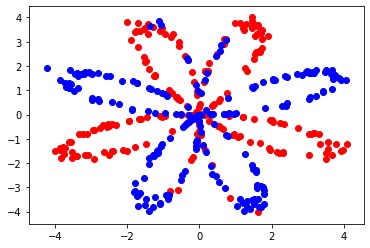

In [88]:
plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")
plt.show()

final loss: 47.35488896437177


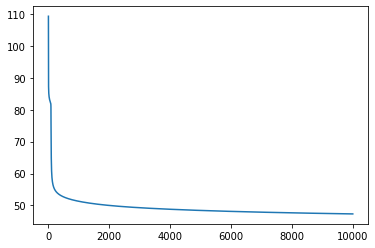

In [89]:
y = y.reshape((-1, 1))
nn = TwoLayersNeuralNetwork(X, y, lr=0.1) # 定义模型
loss_list = [] # 存放损失数值变化

for i in range(10000):
    nn.forward() # 前向传播
    nn.backward() # 反向传播
    loss = nn.loss() # 计算平方损失
    loss_list.append(loss)

print("final loss:", loss)
plt.plot(loss_list) # 绘制 loss 曲线变化图

In [93]:
from sklearn.metrics import accuracy_score

prediction = nn.predict(X, nn.W1, nn.W2)
y = y.reshape((-1,))
prediction = prediction.reshape((-1,))

In [92]:
accuracy_score(prediction, y)

0.7825